In [7]:
# Change filepath here if necessary
TRAIN_CSV_PATH = r"../datasets/train.csv"
PRICES_CSV_PATH = r"../datasets/prices.csv"
CAL_CSV_PATH = r"../datasets/calendar.csv"

In [3]:
import pandas as pd
import seaborn as sns

In [8]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_prices = pd.read_csv(PRICES_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)

### Metadata for train csv

id - an id identifying the smallest data granularity for which the forecast will be assessed: by product and by store

item_id - the id of the item

subcat_id - the id of the subcategory the item belongs to

category_id - the id of the category the item belongs to

store_id - the id of the store the product is sold at

region_id - the id of the region the store is located in

wm_yr_wk - week encoding

In [5]:
df_train.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0


In [30]:
df_train.shape

(30490, 1925)

In [9]:
df_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,East_1,Beauty_1_001,11325,9.58
1,East_1,Beauty_1_001,11326,9.58
2,East_1,Beauty_1_001,11327,8.26
3,East_1,Beauty_1_001,11328,8.26
4,East_1,Beauty_1_001,11329,8.26


In [10]:
df_cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d
0,2011-01-29,11101,Saturday,1,1,2011,d_1
1,2011-01-30,11101,Sunday,2,1,2011,d_2
2,2011-01-31,11101,Monday,3,1,2011,d_3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5


### Data cleaning on train.csv

In [16]:
# Check NAs: All filled
df_train.isna().sum().sum()

0

In [13]:
df_train.dtypes

id             object
item_id        object
subcat_id      object
category_id    object
store_id       object
                ...  
d_1915          int64
d_1916          int64
d_1917          int64
d_1918          int64
d_1919          int64
Length: 1925, dtype: object

In [23]:
# Convert to appropriate datatypes
df_train["id"] = df_train["id"].astype("string")
df_train["item_id"] = df_train["item_id"].astype("string")
df_train["subcat_id"] = df_train["subcat_id"].astype("string")
df_train["category_id"] = df_train["category_id"].astype("string")
df_train["store_id"] = df_train["store_id"].astype("string")
df_train["region_id"] = df_train["region_id"].astype("string")

In [24]:
df_train.dtypes

id             string
item_id        string
subcat_id      string
category_id    string
store_id       string
                ...  
d_1915          int64
d_1916          int64
d_1917          int64
d_1918          int64
d_1919          int64
Length: 1925, dtype: object

### EDA on train.csv

In [32]:
# Number of unique items for each category
len(df_train["item_id"].unique())

3049

In [31]:
print(df_train["category_id"].unique())
print(df_train["store_id"].unique())
print(df_train["region_id"].unique())

<StringArray>
['Beauty', 'Cleaning', 'Food']
Length: 3, dtype: string
<StringArray>
[   'East_1',    'East_2',    'East_3',    'East_4', 'Central_1', 'Central_2',
 'Central_3',    'West_1',    'West_2',    'West_3']
Length: 10, dtype: string
<StringArray>
['East', 'Central', 'West']
Length: 3, dtype: string


#### Breakdown of items
30490 total records

1919 days of no. of items sold

3049 items

3 categories of items (beauty, cleaning, food)

10 different stores

3 different regions (east, central west)

#### Plots to visualise over the 1919 days

In [49]:
id_dates = df_train.columns[6:]

sns.set(rc={'figure.figsize':(14, 8)})

<AxesSubplot:xlabel='day_id', ylabel='items_sold'>

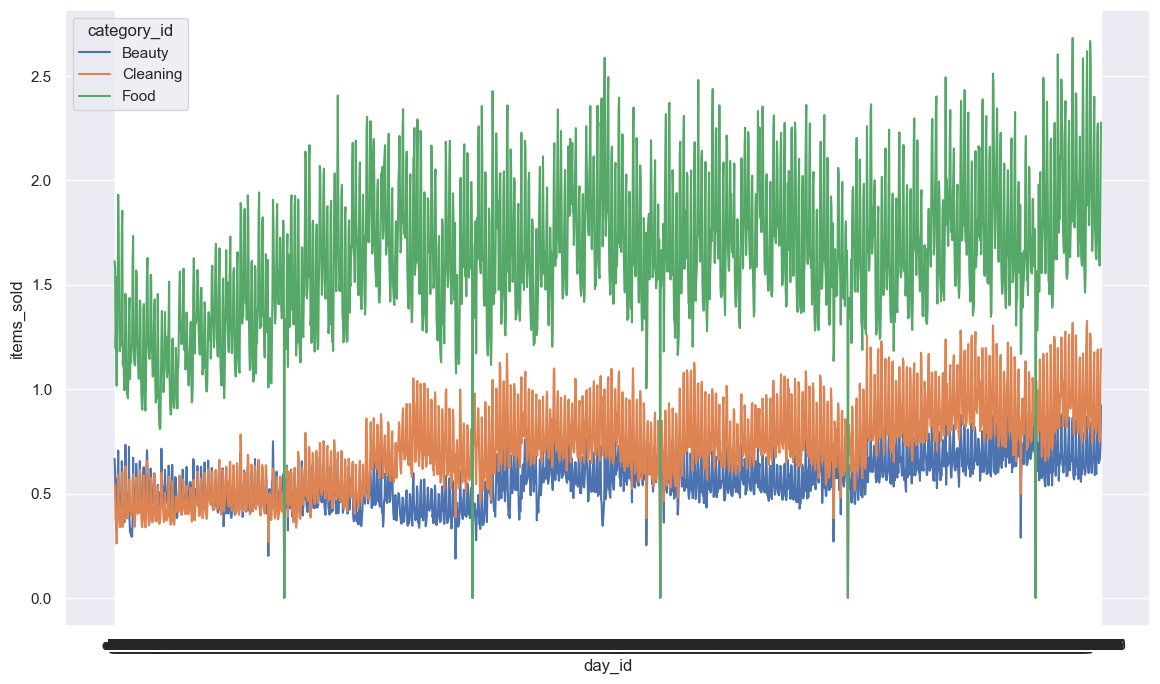

In [50]:
# Items averaged over the category
df_temp = df_train.groupby(["category_id"]).mean()
df_temp.reset_index(inplace=True)
df_temp = pd.melt(df_temp, id_vars = ["category_id"], value_vars = df_temp.columns[1:], var_name = "day_id", value_name = "avg_items_sold")

sns.lineplot(x = "day_id", y = "avg_items_sold", data = df_temp, hue = "category_id")

<AxesSubplot:xlabel='day_id', ylabel='avg_items_sold'>

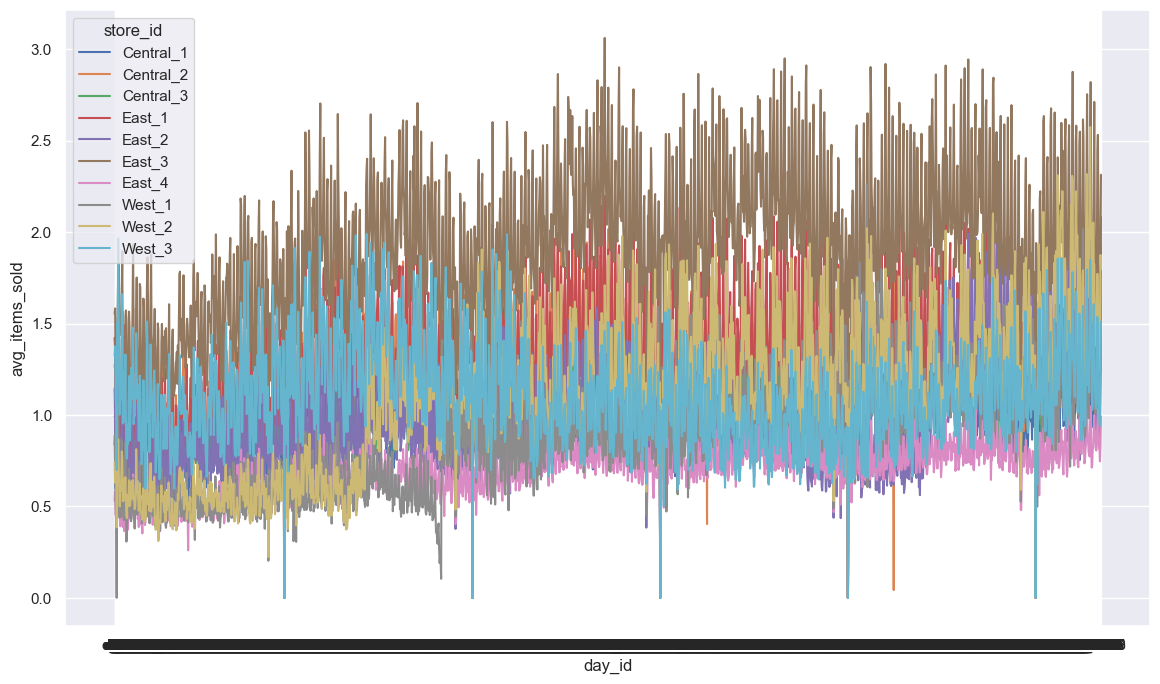

In [51]:
# Items averaged over the stores
df_temp = df_train.groupby(["store_id"]).mean()
df_temp.reset_index(inplace=True)
df_temp = pd.melt(df_temp, id_vars = ["store_id"], value_vars = df_temp.columns[1:], var_name = "day_id", value_name = "avg_items_sold")

sns.lineplot(x = "day_id", y = "avg_items_sold", data = df_temp, hue = "store_id")

<AxesSubplot:xlabel='day_id', ylabel='avg_items_sold'>

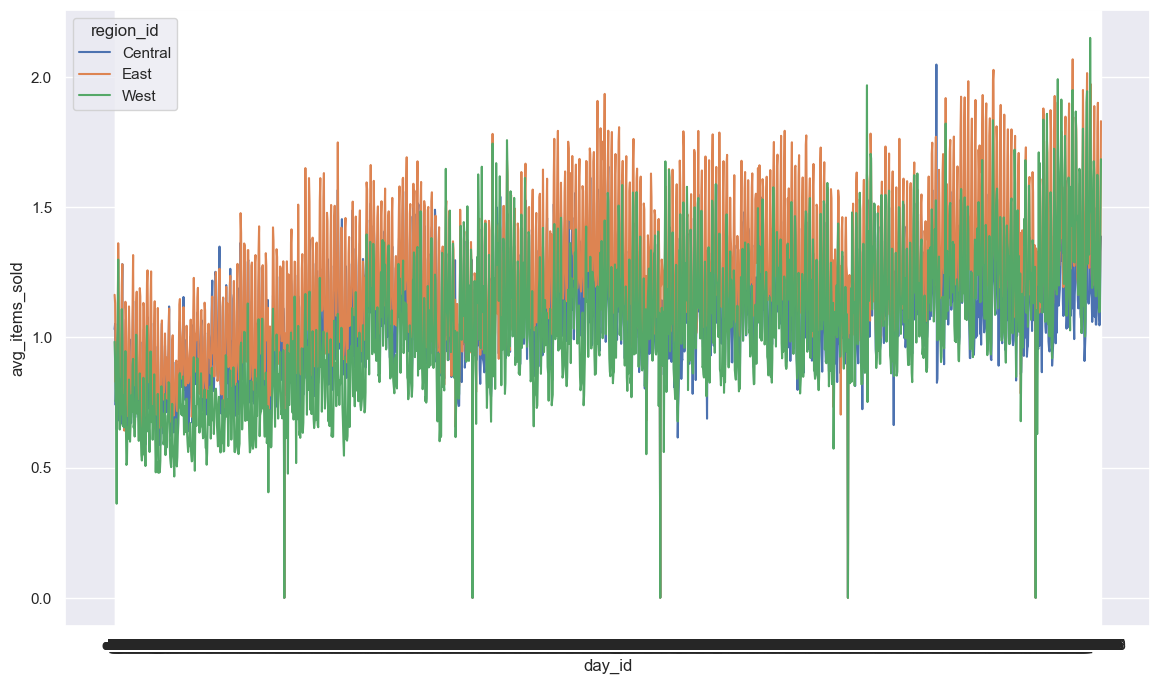

In [52]:
# Items averaged over the regions
df_temp = df_train.groupby(["region_id"]).mean()
df_temp.reset_index(inplace=True)
df_temp = pd.melt(df_temp, id_vars = ["region_id"], value_vars = df_temp.columns[1:], var_name = "day_id", value_name = "avg_items_sold")

sns.lineplot(x = "day_id", y = "avg_items_sold", data = df_temp, hue = "region_id")